# Diffusion computation
https://github.com/alvason/diffusion-computation

### Lecture003 --- Stochastic solution for the diffusion equation

In [1]:
'''
author: Alvason Zhenhua Li
date:   03/19/2015
'''

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import alva_machinery_diffusion as alva

AlvaFontSize = 23;
AlvaFigSize = (12, 4);
numberingFig = 0;

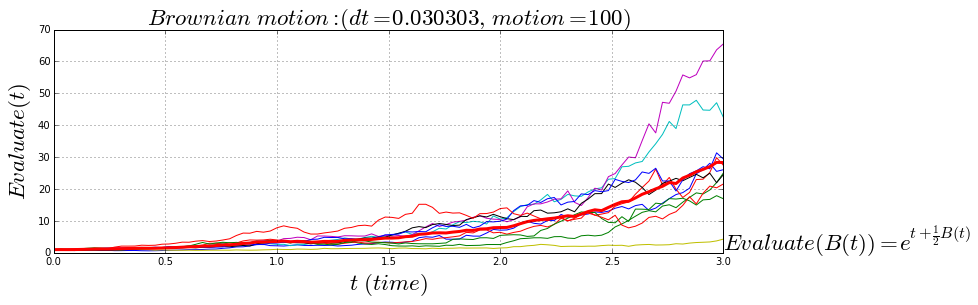

In [2]:
# Avarage Many Brownian ways
minT = float(0)
maxT = float(3)
totalGPoint_T = 100
spacingT = np.linspace(minT, maxT, num = totalGPoint_T, retstep = True)
gridT = spacingT[0]
dt = spacingT[1]
totalWay = 10
GaussSeed = np.sqrt(dt)*np.random.randn(totalWay, totalGPoint_T)

gridB = np.zeros([totalWay, totalGPoint_T])
gridB = np.cumsum(GaussSeed, 1)
gridB[:,0] = 0.0 # initialize B(0) = 0

Evaluate = np.exp(gridT + gridB/2)
EvaluateMean = np.mean(Evaluate, axis = 0)

numberingFig = numberingFig + 1;
plt.figure(numberingFig, figsize = AlvaFigSize); 
plt.plot(gridT, Evaluate[::1].T, linewidth = 1)
plt.plot(gridT, EvaluateMean, linewidth = 3, color = 'red')
plt.grid(True)
plt.title(r'$ Brownian \ motion: (dt = %f,\ motion = %i) $'%(dt, totalGPoint_T)
          , fontsize = AlvaFontSize);
plt.xlabel(r'$t \ (time)$', fontsize = AlvaFontSize); 
plt.ylabel(r'$ Evaluate(t) $', fontsize = AlvaFontSize);
plt.text(maxT, 1, r'$ Evaluate(B(t)) = e^{t + \frac{1}{2}B(t)} $'
         , fontsize = AlvaFontSize);
# plt.legend(('Eva ways', 'Eva Mean'), loc = (1, 1))
plt.show()


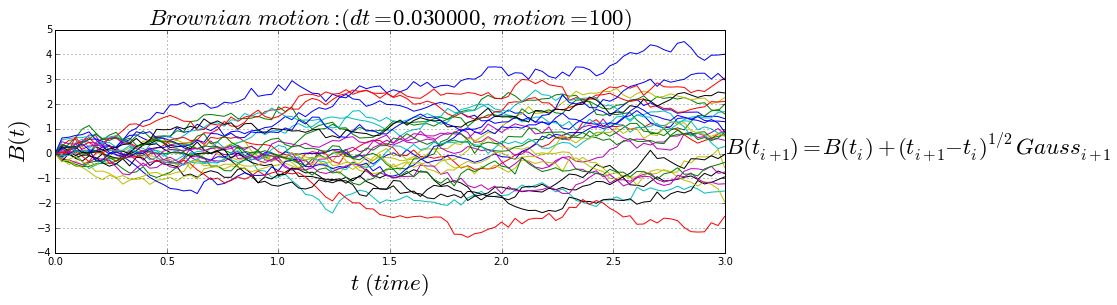

In [3]:
# Many Brownian ways

minT = float(0); maxT = float(3);
totalGPoint_T = 100; 
dt = (maxT - minT)/totalGPoint_T;
gridT = np.linspace(minT, maxT, totalGPoint_T); 

totalWay = 30;
GaussSeed = np.sqrt(dt)*np.random.randn(totalWay, totalGPoint_T); 

gridB = np.zeros([totalWay, totalGPoint_T]); 
gridB = np.cumsum(GaussSeed, 1);
gridB[:,0] = 0.0; # initialize B(0) = 0

numberingFig = numberingFig + 1;
plt.figure(numberingFig, figsize = AlvaFigSize);     
plt.plot(gridT, gridB.T);
plt.grid(True)
plt.title(r'$ Brownian \ motion: (dt = %f,\ motion = %i) $'%(dt, totalGPoint_T)
          , fontsize = AlvaFontSize);
plt.xlabel(r'$t \ (time)$', fontsize = AlvaFontSize); 
plt.ylabel(r'$ B(t) $', fontsize = AlvaFontSize);
plt.text(maxT, minT, r'$ B(t_{i+1}) = B(t_i) + (t_{i+1} - t_i)^{1/2}Gauss_{i+1} $'
         , fontsize = AlvaFontSize);
plt.show()

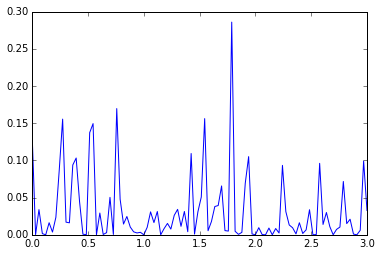

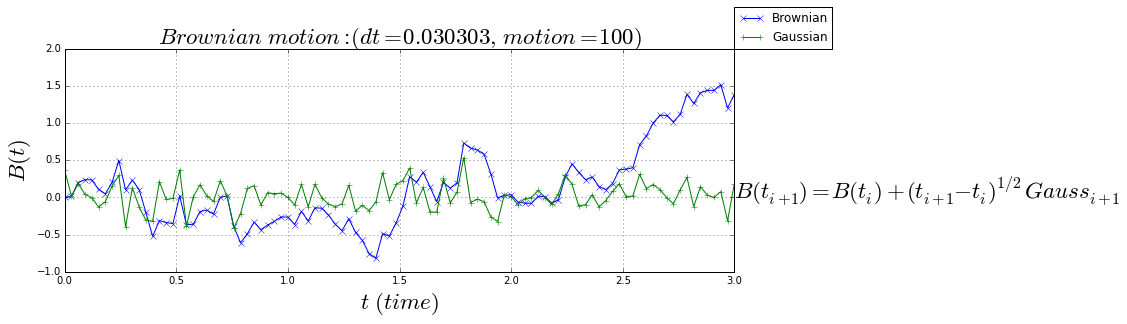

In [4]:
# Brownian motion
minT = float(0)
maxT = float(3)
totalGPoint_T = 100
spacingT = np.linspace(minT, maxT, num = totalGPoint_T, retstep = True)
gridT = spacingT[0]
dt = spacingT[1]
totalWay = 10
GaussSeed = np.sqrt(dt)*np.random.randn(totalGPoint_T)

# checking Gauss distribution
ddd = np.zeros(totalGPoint_T)
for tn in range(totalGPoint_T):
    ddd[tn] = GaussSeed[tn]**2;
plt.plot(gridT, ddd)

gridT = np.linspace(minT, maxT, totalGPoint_T); 

gridB = np.zeros(totalGPoint_T);

for tn in range(totalGPoint_T - 1):
    gridB[tn + 1] = gridB[tn] + GaussSeed[tn + 1]
    
# gridB = np.cumsum(GaussSeed); 
# gridB[0] = 0.0; # initialize B(0) = 0

numberingFig = numberingFig + 1;
plt.figure(numberingFig, figsize = AlvaFigSize);     
plt.plot(gridT, gridB, marker = 'x', label = 'Brownian');
plt.plot(gridT, GaussSeed, marker = '+', label = 'Gaussian');
plt.grid(True)
plt.title(r'$ Brownian \ motion: (dt = %f,\ motion = %i) $'%(dt, totalGPoint_T)
          , fontsize = AlvaFontSize);
plt.xlabel(r'$t \ (time)$', fontsize = AlvaFontSize); 
plt.ylabel(r'$ B(t) $', fontsize = AlvaFontSize);
plt.text(maxT, minT, r'$ B(t_{i+1}) = B(t_i) + (t_{i+1} - t_i)^{1/2}Gauss_{i+1} $'
         , fontsize = AlvaFontSize);
plt.legend(loc = (1, 1))
plt.show()


Error at endpoint:  0.0549089588106


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


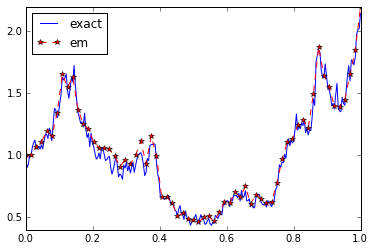

In [5]:
np.random.seed(100)

gamma=2; mu=1; Xzero=1
T=1; N=2**8; dt = float(T)/N
t=np.linspace(0,T,N+1)

dW=np.sqrt(dt)*np.random.randn(1,N)
W=np.cumsum(dW)

Xtrue=Xzero*np.exp((gamma-0.5*mu**2)*t[1:]+mu*W); Xtrue=np.insert(Xtrue,0,Xzero)
ax=plt.subplot(111)
ax.plot(t,Xtrue)

R=4; Dt=R*dt; L=float(N)/R
Xem=np.zeros(L+1); Xem[0] = Xzero

for j in xrange(1,int(L)+1):
    Winc=np.sum(dW[0][range(R*(j-1),R*j)])
    Xem[j] = Xem[j-1] + Dt*gamma*Xem[j-1] + mu*Xem[j-1]*Winc

emerr=np.abs(Xem[-1]-Xtrue[-1])
print "Error at endpoint: ", emerr

ax.plot(np.linspace(0,T,L+1),Xem,'r--*')
ax.legend(("exact","em"),loc=2)
plt.show()